<a href="https://colab.research.google.com/github/youcine/Diamond-Price-Prediction-with-Machine-Learning/blob/main/Models_Parameters_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Models Parameters Tuning:**

**We will go through parameters fine tuning only with models with the high scores and low RMSE:**
1. RandomForest
2. LGBM
3. XGBoost


**RandomForest**

In [ ]:
parameters = {
    'n_estimators': [200, 400, 600],
    'max_depth': [50, 60, 70],
    'max_features': [5,10,15],
    }
rf = RandomForestRegressor(random_state=42)
rf_rs = RandomizedSearchCV(rf, parameters, scoring = 'neg_mean_squared_error', cv=10)
rf_rs.fit(X_train, y_train)
rf_rs.best_params_

{'n_estimators': 600, 'max_features': 10, 'max_depth': 70}

In [ ]:
np.sqrt(-rf_rs.best_score_)

533.9260550542344

In [ ]:
rf_rs.best_estimator_

RandomForestRegressor(max_depth=70, max_features=10, n_estimators=600,
                      random_state=42)

In [ ]:
# rf_best = RandomForestRegressor(n_estimators = 200, max_features= 10, max_depth = 50)
# rf_best.fit(X_train,y_train)
y_pred = rf_rs.predict(X_test)
rf_rs.score(X_test, y_test), rf_rs.score(X_train, y_train)

(-303670.9059516824, -37949.108703996986)

In [ ]:
RMSE_rf = mean_squared_error(y_test, y_pred, squared=False)
RMSE_rf

551.0634318766602

In [ ]:
feature_importances_rf= pd.DataFrame(rf_best.feature_importances_,
                                     index = X_train.columns,
                                     columns = ['importance']).sort_values('importance', ascending=False)


In [ ]:
feature_importances_rf['feature'] = feature_importances_rf.index

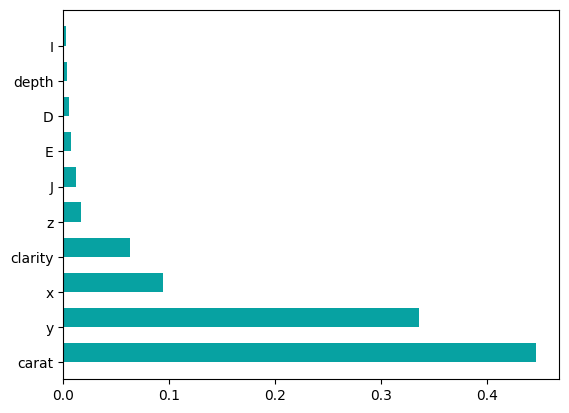

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_rf.feature[:10],
        feature_importances_rf.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:

joblib.dump(rf_best, "randomforest_model.pkl")

['randomforest_model.pkl']

data 2

In [ ]:
parameters = {
    'n_estimators': [200, 400, 600],
    'max_depth': [50, 60, 70],
    'max_features': [5,10,15],
    }
rf = RandomForestRegressor(random_state=42)
rf_rs = RandomizedSearchCV(rf, parameters, scoring = 'neg_mean_squared_error', cv=10)
rf_rs.fit(X2_train, y2_train)
rf_rs.best_params_

In [ ]:
np.sqrt(-rf_rs.best_score_)

In [ ]:
rf_rs.best_estimator_

In [ ]:
# rf_best = RandomForestRegressor(n_estimators = 200, max_features= 10, max_depth = 50)
# rf_best.fit(X_train,y_train)
y_pred = rf_rs.predict(X2_test)
rf_rs.score(X2_test, y2_test), rf_rs.score(X2_train, y2_train)

In [ ]:
RMSE_rf = mean_squared_error(y2_test, y_pred, squared=False)
RMSE_rf

In [ ]:
feature_importances_rf= pd.DataFrame(rf_rs.feature_importances_,
                                     index = X2_train.columns,
                                     columns = ['importance']).sort_values('importance', ascending=False)


In [ ]:
feature_importances_rf['feature'] = feature_importances_rf.index

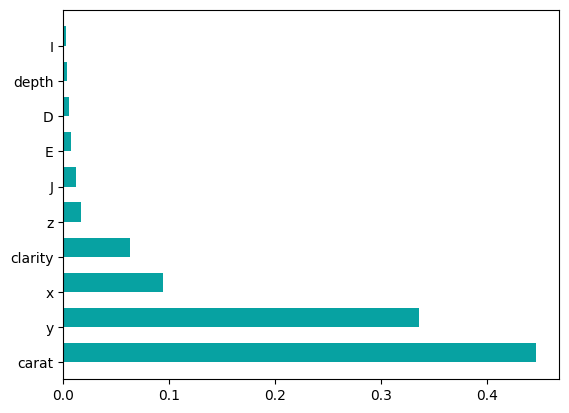

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_rf.feature[:10],
        feature_importances_rf.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:
joblib.dump(rf_best, "randomforest_model.pkl")

Data 3

In [ ]:
parameters = {
    'n_estimators': [200, 400, 600],
    'max_depth': [50, 60, 70],
    'max_features': [5,10,15],
    }
rf = RandomForestRegressor(random_state=42)
rf_rs = RandomizedSearchCV(rf, parameters, scoring = 'neg_mean_squared_error', cv=10)
rf_rs.fit(X_train, y_train)
rf_rs.best_params_

KeyboardInterrupt: 

In [ ]:
np.sqrt(-rf_rs.best_score_)

533.9260550542344

In [ ]:
rf_rs.best_estimator_

RandomForestRegressor(max_depth=70, max_features=10, n_estimators=600,
                      random_state=42)

In [ ]:
# rf_best = RandomForestRegressor(n_estimators = 200, max_features= 10, max_depth = 50)
# rf_best.fit(X_train,y_train)
y_pred = rf_rs.predict(X_test)
rf_rs.score(X_test, y_test), rf_rs.score(X_train, y_train)

(-303670.9059516824, -37949.108703996986)

In [ ]:
RMSE_rf = mean_squared_error(y_test, y_pred, squared=False)
RMSE_rf

551.0634318766602

**LGBM**

In [ ]:
parameters = {
    'n_estimators': [200, 250, 300],
    'reg_alpha': [0.1, 0.5, 1],
    }
lgbm = LGBMRegressor()
lgbm_rs = RandomizedSearchCV(lgbm, parameters, scoring = 'neg_mean_squared_error', cv=10)
lgbm_rs.fit(X_train, y_train)
lgbm_rs.best_params_

In [ ]:
np.sqrt(-lgbm_rs.best_score_)

517.9288747529464

In [ ]:
lgbm_rs.best_estimator_

LGBMRegressor(n_estimators=250, reg_alpha=0.1)

In [ ]:
lgbm_best = LGBMRegressor(n_estimators = 250, max_features= 6, reg_alpha=0.1)
lgbm_best.fit(X_train,y_train)
y_pred = lgbm_best.predict(X_test)
lgbm_best.score(X_test, y_test), lgbm_best.score(X_train, y_train)


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 33632, number of used features: 15
[LightGBM] [Info] Start training from score 3838.544095
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


(0.9804735156978907, 0.9896222537545278)

In [ ]:
RMSE_lgbm = mean_squared_error(y_test, y_pred, squared=False)
RMSE_lgbm

539.2784079172043

In [ ]:
feature_importances_lgbm= pd.DataFrame(lgbm_best.feature_importances_,
                                     index = X_train.columns,
                                     columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances_lgbm['feature'] = feature_importances_lgbm.index

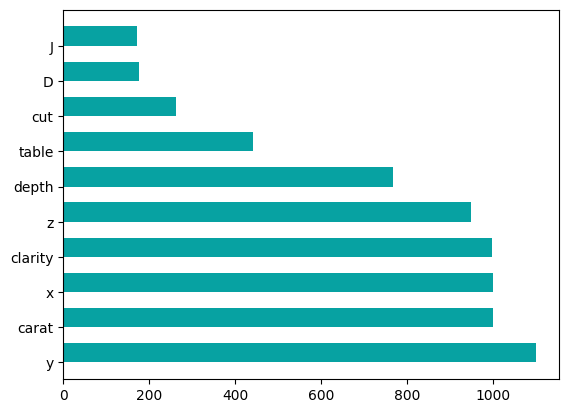

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_lgbm.feature[:10],
        feature_importances_lgbm.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:
joblib.dump(lgbm_best, "lgbm_model.pkl")

['lgbm_model.pkl']

data 2

In [ ]:
parameters = {
    'n_estimators': [200, 250, 300],
    'reg_alpha': [0.1, 0.5, 1],
    }
lgbm = LGBMRegressor()
lgbm_rs = RandomizedSearchCV(lgbm, parameters, scoring = 'neg_mean_squared_error', cv=10)
lgbm_rs.fit(X2_train, y2_train)
lgbm_rs.best_params_

In [ ]:
np.sqrt(-lgbm_rs.best_score_)

In [ ]:
lgbm_rs.best_estimator_

In [ ]:
lgbm_best = LGBMRegressor(n_estimators = 250, max_features= 6, reg_alpha=0.1)
lgbm_best.fit(X2_train,y2_train)
y_pred = lgbm_best.predict(X2_test)
lgbm_best.score(X2_test, y2_test), lgbm_best.score(X2_train, y2_train)


In [ ]:
RMSE_lgbm = mean_squared_error(y2_test, y2_pred, squared=False)
RMSE_lgbm

In [ ]:
feature_importances_lgbm= pd.DataFrame(lgbm_best.feature_importances_,
                                     index = X2_train.columns,
                                     columns = ['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances_lgbm['feature'] = feature_importances_lgbm.index

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_lgbm.feature[:10],
        feature_importances_lgbm.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:
joblib.dump(lgbm_best, "lgbm_model.pkl")

['lgbm_model.pkl']

Data 3

In [ ]:
parameters = {
    'n_estimators': [200, 250, 300],
    'reg_alpha': [0.1, 0.5, 1],
    }
lgbm = LGBMRegressor()
lgbm_rs = RandomizedSearchCV(lgbm, parameters, scoring = 'neg_mean_squared_error', cv=10)
lgbm_rs.fit(X_train, y_train)
lgbm_rs.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1517
[LightGBM] [Info] Number of data points in the train set: 31063, number of used features: 10
[LightGBM] [Info] Start training from score 3937.876412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1514
[LightGBM] [Info] Number of data points in the train set: 31063, number of used features: 10
[LightGBM] [Info] Start training from score 3942.650130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1513
[LightGBM] [Info] Number of data points in the train set: 31063, number of used features: 10
[LightGBM] [Info] Sta

{'reg_alpha': 0.1, 'n_estimators': 250}

In [ ]:
np.sqrt(-lgbm_rs.best_score_)

545.7565754281236

In [ ]:
lgbm_rs.best_estimator_

LGBMRegressor(n_estimators=250, reg_alpha=0.1)

In [ ]:
lgbm_best = LGBMRegressor(n_estimators = 250, max_features= 6, reg_alpha=0.1)
lgbm_best.fit(X_train,y_train)
y_pred = lgbm_best.predict(X_test)
lgbm_best.score(X_test, y_test), lgbm_best.score(X_train, y_train)


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1518
[LightGBM] [Info] Number of data points in the train set: 34515, number of used features: 10
[LightGBM] [Info] Start training from score 3935.219180
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


(0.9831294675429738, 0.9894110294853254)

In [ ]:
RMSE_lgbm = mean_squared_error(y_test, y_pred, squared=False)
RMSE_lgbm

518.8691991651107

**XGBoost**

In [ ]:
parameters = {
    'n_estimators': [600, 700, 800],
    'learning_rate': [0.01, 0.05],
    'min_split_loss': [0, 0.1],
    }
xgbm = XGBRegressor()
xgbm_rs = RandomizedSearchCV(xgbm, parameters, scoring = 'neg_mean_squared_error', cv=10)
xgbm_rs.fit(X_train, y_train)
xgbm_rs.best_params_

{'n_estimators': 600, 'min_split_loss': 0, 'learning_rate': 0.05}

In [ ]:
np.sqrt(-xgbm_rs.best_score_)

518.4588979840512

In [ ]:
xgbm_rs.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, min_split_loss=0, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# xgbm.feature_importances_
# xgbm_best = XGBRegressor(n_estimators= 600, learning_rate=0.01, max_depth=10, min_split_loss=0.1)
# xgbm_best.fit(X_train, y_train)
train_score = xgbm_rs.score(X_train, y_train)
test_score = xgbm_rs.score(X_test, y_test)

print('XGBoost Regression model score using train set is: ', round(train_score, 3))
print('XGBoost Regression model score using train set is: ',  round(test_score, 3))

XGBoost Regression model score using train set is:  -131447.919
XGBoost Regression model score using train set is:  -295717.866


In [ ]:
y_pred = xgbm_rs.predict(X_test)


In [ ]:
RMSE_xgbm = mean_squared_error(y_test, y_pred, squared=False)
RMSE_xgbm

543.7994725400665

In [ ]:
feature_importances_xgbm = pd.DataFrame(xgbm_best.feature_importances_,
                                        index = X_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_xgbm['feature'] = feature_importances_xgbm.index

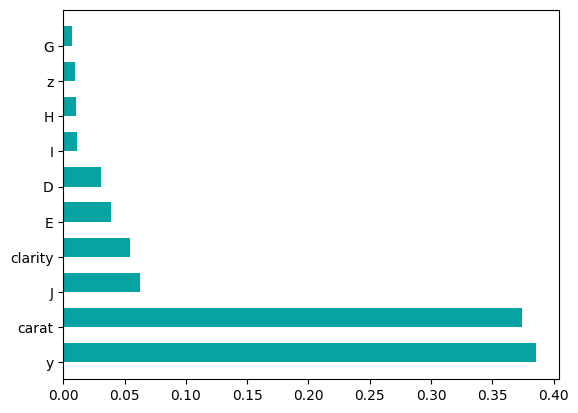

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_xgbm.feature[:10],
        feature_importances_xgbm.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:
joblib.dump(xgbm_best, "xgbm_model.pkl")

['xgbm_model.pkl']

data 2

In [ ]:
parameters = {
    'n_estimators': [600, 700, 800],
    'learning_rate': [0.01, 0.05],
    'min_split_loss': [0, 0.1],
    }
xgbm = XGBRegressor()
xgbm_rs = RandomizedSearchCV(xgbm, parameters, scoring = 'neg_mean_squared_error', cv=10)
xgbm_rs.fit(X2_train, y2_train)
xgbm_rs.best_params_

In [ ]:
np.sqrt(-xgbm_rs.best_score_)

In [ ]:
xgbm_rs.best_estimator_

In [ ]:
# xgbm.feature_importances_
# xgbm_best = XGBRegressor(n_estimators= 600, learning_rate=0.01, max_depth=10, min_split_loss=0.1)
# xgbm_best.fit(X_train, y_train)
train_score = xgbm_rs.score(X2_train, y2_train)
test_score = xgbm_rs.score(X2_test, y2_test)

print('XGBoost Regression model score using train set is: ', round(train_score, 3))
print('XGBoost Regression model score using train set is: ',  round(test_score, 3))

In [ ]:
y_pred = xgbm_rs.predict(X2_test)


In [ ]:
RMSE_xgbm = mean_squared_error(y2_test, y_pred, squared=False)
RMSE_xgbm

In [ ]:
feature_importances_xgbm = pd.DataFrame(xgbm_best.feature_importances_,
                                        index = X2_train.columns,
                                        columns = ['importance']).sort_values('importance', ascending=False)
feature_importances_xgbm['feature'] = feature_importances_xgbm.index

In [ ]:
fig, ax = plt.subplots()
ax.barh(feature_importances_xgbm.feature[:10],
        feature_importances_xgbm.importance[:10],
        height=0.55, align="edge",
        color="#07a2a2");
plt.show()

In [ ]:
joblib.dump(xgbm_best, "xgbm_model.pkl")

Data 3

In [ ]:
parameters = {
    'n_estimators': [600, 700, 800],
    'learning_rate': [0.01, 0.05],
    'min_split_loss': [0, 0.1],
    }
xgbm = XGBRegressor()
xgbm_rs = RandomizedSearchCV(xgbm, parameters, scoring = 'neg_mean_squared_error', cv=10)
xgbm_rs.fit(X_train, y_train)
xgbm_rs.best_params_

{'n_estimators': 600, 'min_split_loss': 0.1, 'learning_rate': 0.05}

In [ ]:
np.sqrt(-xgbm_rs.best_score_)

541.0673367999939

In [ ]:
xgbm_rs.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, min_split_loss=0.1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# xgbm.feature_importances_
# xgbm_best = XGBRegressor(n_estimators= 600, learning_rate=0.01, max_depth=10, min_split_loss=0.1)
# xgbm_best.fit(X_train, y_train)
train_score = xgbm_rs.score(X_train, y_train)
test_score = xgbm_rs.score(X_test, y_test)

print('XGBoost Regression model score using train set is: ', round(train_score, 3))
print('XGBoost Regression model score using train set is: ',  round(test_score, 3))

XGBoost Regression model score using train set is:  -141088.501
XGBoost Regression model score using train set is:  -271873.239


In [ ]:
y_pred = xgbm_rs.predict(X_test)


In [ ]:
RMSE_xgbm = mean_squared_error(y_test, y_pred, squared=False)
RMSE_xgbm

521.4146516972505